In [1]:
import pandas as pd
# Load the data
df = pd.read_csv('../data/cyberbullying_preprocessed.csv')
data = [tuple(x) for x in df.values]
print('Número de datos cargados: {num}'.format(num=len(data)))

Número de datos cargados: 81081


In [2]:
# Divido los datos en dos listas 
#     X: los mensajes de texto
#     y: las etiquetas

X = [doc[2] for doc in data]
y = [doc[1] for doc in data]

print('X: {num}'.format(num=X[:5]))
print('y: {num}'.format(num=y[:5]))

X: ['word katandandre food crapilicious mkr', 'aussietv white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc', 'classy whore red velvet cupcake', 'meh p thank head concerned angry dude twitter', 'isis account pretend kurdish account like islam lie']
y: [0, 0, 0, 0, 0]


In [3]:
bow = dict()

for doc in X:
    for word in doc.split():
        if word in bow:
            bow[word] += 1
        else:
            bow[word] = 1
# Imprimir el BoW
print(bow)

{'word': 1242, 'katandandre': 60, 'food': 306, 'crapilicious': 2, 'mkr': 4633, 'aussietv': 2, 'white': 2450, 'theblock': 3, 'imacelebrityau': 9, 'today': 915, 'sunrise': 5, 'studio': 20, 'neighbour': 6, 'wonderlandten': 2, 'etc': 465, 'classy': 49, 'whore': 375, 'red': 199, 'velvet': 5, 'cupcake': 21, 'meh': 58, 'p': 700, 'thank': 1094, 'head': 691, 'concerned': 58, 'angry': 178, 'dude': 803, 'twitter': 1091, 'isis': 1036, 'account': 367, 'pretend': 143, 'kurdish': 42, 'like': 8808, 'islam': 1733, 'lie': 712, 'yes': 1278, 'test': 115, 'god': 1040, 'good': 3066, 'bad': 2106, 'indifferent': 5, 'weird': 433, 'prove': 250, 'existence': 45, 'karma': 102, 'hope': 975, 'bite': 62, 'kat': 1024, 'butt': 106, 'nasty': 169, 'priest': 28, 'rebecca': 28, 'black': 2936, 'drop': 212, 'school': 9315, 'bully': 10316, 'flush': 10, 'kd': 2, 'turkish': 46, 'state': 460, 'kill': 1429, 'child': 824, 'year': 2024, 'news': 356, 'googleeviricitopluluukrteyidee': 1, 'love': 2473, 'response': 167, 'hotcake': 7, 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Inicializar el vectorizador TF-IDF
# max_features: número máximo de términos a considerar
# min_df: eliminar palabras que aparezcan en menos de min_df documentos
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=3)

# Ajustar y transformar la columna 'text' del DataFrame pre-procesado
X = tfidf_vectorizer.fit_transform(X)

# Guardar el vectorizador ajustado
joblib.dump(tfidf_vectorizer, '../models/tfidf_vectorizer.pkl')

# En otra sesión de Python o script, puedes cargar el vectorizador ajustado
tfidf_vectorizer = joblib.load('../models/tfidf_vectorizer.pkl')

# Resultados
print('Términos del BoW:\n')
print(tfidf_vectorizer.get_feature_names_out())

print('\nMatriz de términos del BoW:\n')
print(X.toarray())

Términos del BoW:

['able' 'abortion' 'absolutely' 'abt' 'abuse' 'accept' 'account' 'accuse'
 'act' 'action' 'actual' 'actually' 'ad' 'add' 'address' 'admit' 'adult'
 'afraid' 'african' 'age' 'ago' 'agree' 'ah' 'air' 'al' 'alive' 'allah'
 'allow' 'alot' 'amazing' 'america' 'american' 'americans' 'amp' 'andre'
 'angel' 'angry' 'animal' 'annie' 'annoying' 'answer' 'anti' 'anymore'
 'apologize' 'app' 'apparently' 'appreciate' 'arab' 'area' 'argue' 'army'
 'art' 'article' 'ask' 'ass' 'assault' 'asshole' 'assume' 'attack'
 'attention' 'aw' 'away' 'awesome' 'awful' 'baby' 'bad' 'ball' 'ban'
 'band' 'base' 'basically' 'bc' 'be' 'bear' 'beat' 'beautiful' 'bed'
 'behavior' 'belief' 'believe' 'belong' 'bet' 'big' 'bill' 'birthday'
 'bit' 'bitch' 'black' 'blame' 'blameonenotall' 'blm' 'block' 'blog'
 'blonde' 'blood' 'bloody' 'blow' 'blue' 'body' 'bomb' 'book' 'bother'
 'bout' 'boy' 'boyfriend' 'brain' 'break' 'breakfast' 'bring' 'bro'
 'brother' 'brown' 'bs' 'btw' 'build' 'bullshit' 'bully' 'bul

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Número de Mensajes para el entrenamiento: {num}'.format(num=X_train.shape[0]))
print('Número de Mensajes para el test: {num}'.format(num=X_test.shape[0]))

Número de Mensajes para el entrenamiento: 64864
Número de Mensajes para el test: 16217


In [6]:
# Importamos los clasificadores
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# ---- Inicializamos los clasificadores ----

# Explicación de MultinomialNB y BernoulliNB
# El clasificador de Naive Bayes multinomial es adecuado para datos discretos.
# Mientras que el clasificador de Naive Bayes de Bernoulli es adecuado para datos binarios.
multinomial_nb_classifier = MultinomialNB()
bernoulli_nb_classifier = BernoulliNB()

# Explicación de LogisticRegression
# El clasificador de regresión logística es un clasificador lineal.
# solver: es el algoritmo a utilizar en el problema de optimización. Los valores, en este caso, son 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'. Por defecto es 'lbfgs'.
# multi_class: es el esquema de clasificación. Los valores, en este caso, son 'ovr' (one-vs-rest) y 'multinomial'. Por defecto es 'ovr'.
# max_iter: es el número máximo de iteraciones. Por defecto es 100.
logistic_regression_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

# Explicación de SVC
# El clasificador de máquinas de vectores de soporte (SVC) es un clasificador binario.
# kernel: especifica el tipo de kernel a utilizar en el algoritmo. Los valores, en este caso, son 'linear', 'poly', 'rbf', 'sigmoid'. Por defecto es 'rbf'.
linear_svm_classifier = SVC(kernel='linear')
poly_svm_classifier = SVC(kernel='poly')
rbf_svm_classifier = SVC(kernel='rbf')
sigmoid_svm_classifier = SVC(kernel='sigmoid')

# Explicación de RandomForestClassifier
# El clasificador de bosque aleatorio es un conjunto de árboles de decisión.
# n_estimators: número de árboles en el bosque.
# bootstrap: es un booleano que indica si se debe usar el muestreo con reemplazo. El muestreo con reemplazo permite que un mismo dato se tome varias veces en la muestra.
# criterion: es la función para medir la calidad de una división. Los criterios soportados son 'gini' para la impureza de Gini y 'entropy' para la ganancia de información. Es recomendable usar 'gini' ya que es más rápido.
# max_depth: es la profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras. Por defecto es None.
# random_state: es la semilla para el generador de números aleatorios. Si es None, se usará np.random.
random_forest_depth_20_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=20, random_state=0)
random_forest_depth_50_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

# Diccionario de clasificadores
classifiers = {'Multinomial NB': multinomial_nb_classifier,
               'Bernoulli NB': bernoulli_nb_classifier,
               'Logistic Regression': logistic_regression_classifier,
               'Linear SVM': linear_svm_classifier,
               'Polynomial SVM': poly_svm_classifier,
               'RBF Kernel SVM': rbf_svm_classifier,
               'Sigmoid Kernel SVM': sigmoid_svm_classifier,
               'Random Forest Depth 20': random_forest_depth_20_classifier,
               'Random Forest Depth 50': random_forest_depth_50_classifier}


In [7]:

# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in classifiers.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Multinomial NB
CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Logistic Regression
CREANDO MODELO: Linear SVM
CREANDO MODELO: Polynomial SVM
CREANDO MODELO: RBF Kernel SVM
CREANDO MODELO: Sigmoid Kernel SVM
CREANDO MODELO: Random Forest Depth 20
CREANDO MODELO: Random Forest Depth 50


In [8]:
# Guardamos los modelos
import joblib

for k, v in classifiers.items():
    joblib.dump(v, '../models/{model}.pkl'.format(model='_'.join(k.lower().split())))
    print('Modelo {model} guardado'.format(model=k))

Modelo Multinomial NB guardado
Modelo Bernoulli NB guardado
Modelo Logistic Regression guardado
Modelo Linear SVM guardado
Modelo Polynomial SVM guardado
Modelo RBF Kernel SVM guardado
Modelo Sigmoid Kernel SVM guardado
Modelo Random Forest Depth 20 guardado
Modelo Random Forest Depth 50 guardado


In [6]:
# Cargamos los modelos
import joblib
classifiers = {}
def load_models(models):
    models = ['Multinomial NB', 'Bernoulli NB', 'Logistic Regression', 'Linear SVM', 'Polynomial SVM', 'RBF Kernel SVM', 'Sigmoid Kernel SVM', 'Random Forest Depth 20', 'Random Forest Depth 50']
    for model in models:
        classifiers[model] = joblib.load('../models/{model}.pkl'.format(model='_'.join(model.lower().split())))
    return classifiers

classifiers = load_models(classifiers)

In [7]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):

    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in classifiers.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial NB,0.742662,0.741814,0.739008,0.738100,0.742662,0.741814,0.738654,0.737537
Bernoulli NB,0.771383,0.769809,0.800464,0.798814,0.771383,0.769809,0.774124,0.772558
Logistic Regression,0.787370,0.782142,0.796359,0.791067,0.787370,0.782142,0.789379,0.784182
Linear SVM,0.788912,0.788494,0.811208,0.810738,0.788912,0.788494,0.791489,0.791065
Polynomial SVM,0.899698,0.780292,0.899578,0.780503,0.899698,0.780292,0.899630,0.780394
RBF Kernel SVM,0.874060,0.793858,0.880350,0.804507,0.874060,0.793858,0.875137,0.795955
Sigmoid Kernel SVM,0.723637,0.746377,0.730278,0.753027,0.723637,0.746377,0.725736,0.748349
Random Forest Depth 20,0.787617,0.775729,0.805458,0.791762,0.787617,0.775729,0.790142,0.778324
Random Forest Depth 50,0.826545,0.788555,0.862993,0.821484,0.826545,0.788555,0.828493,0.790999


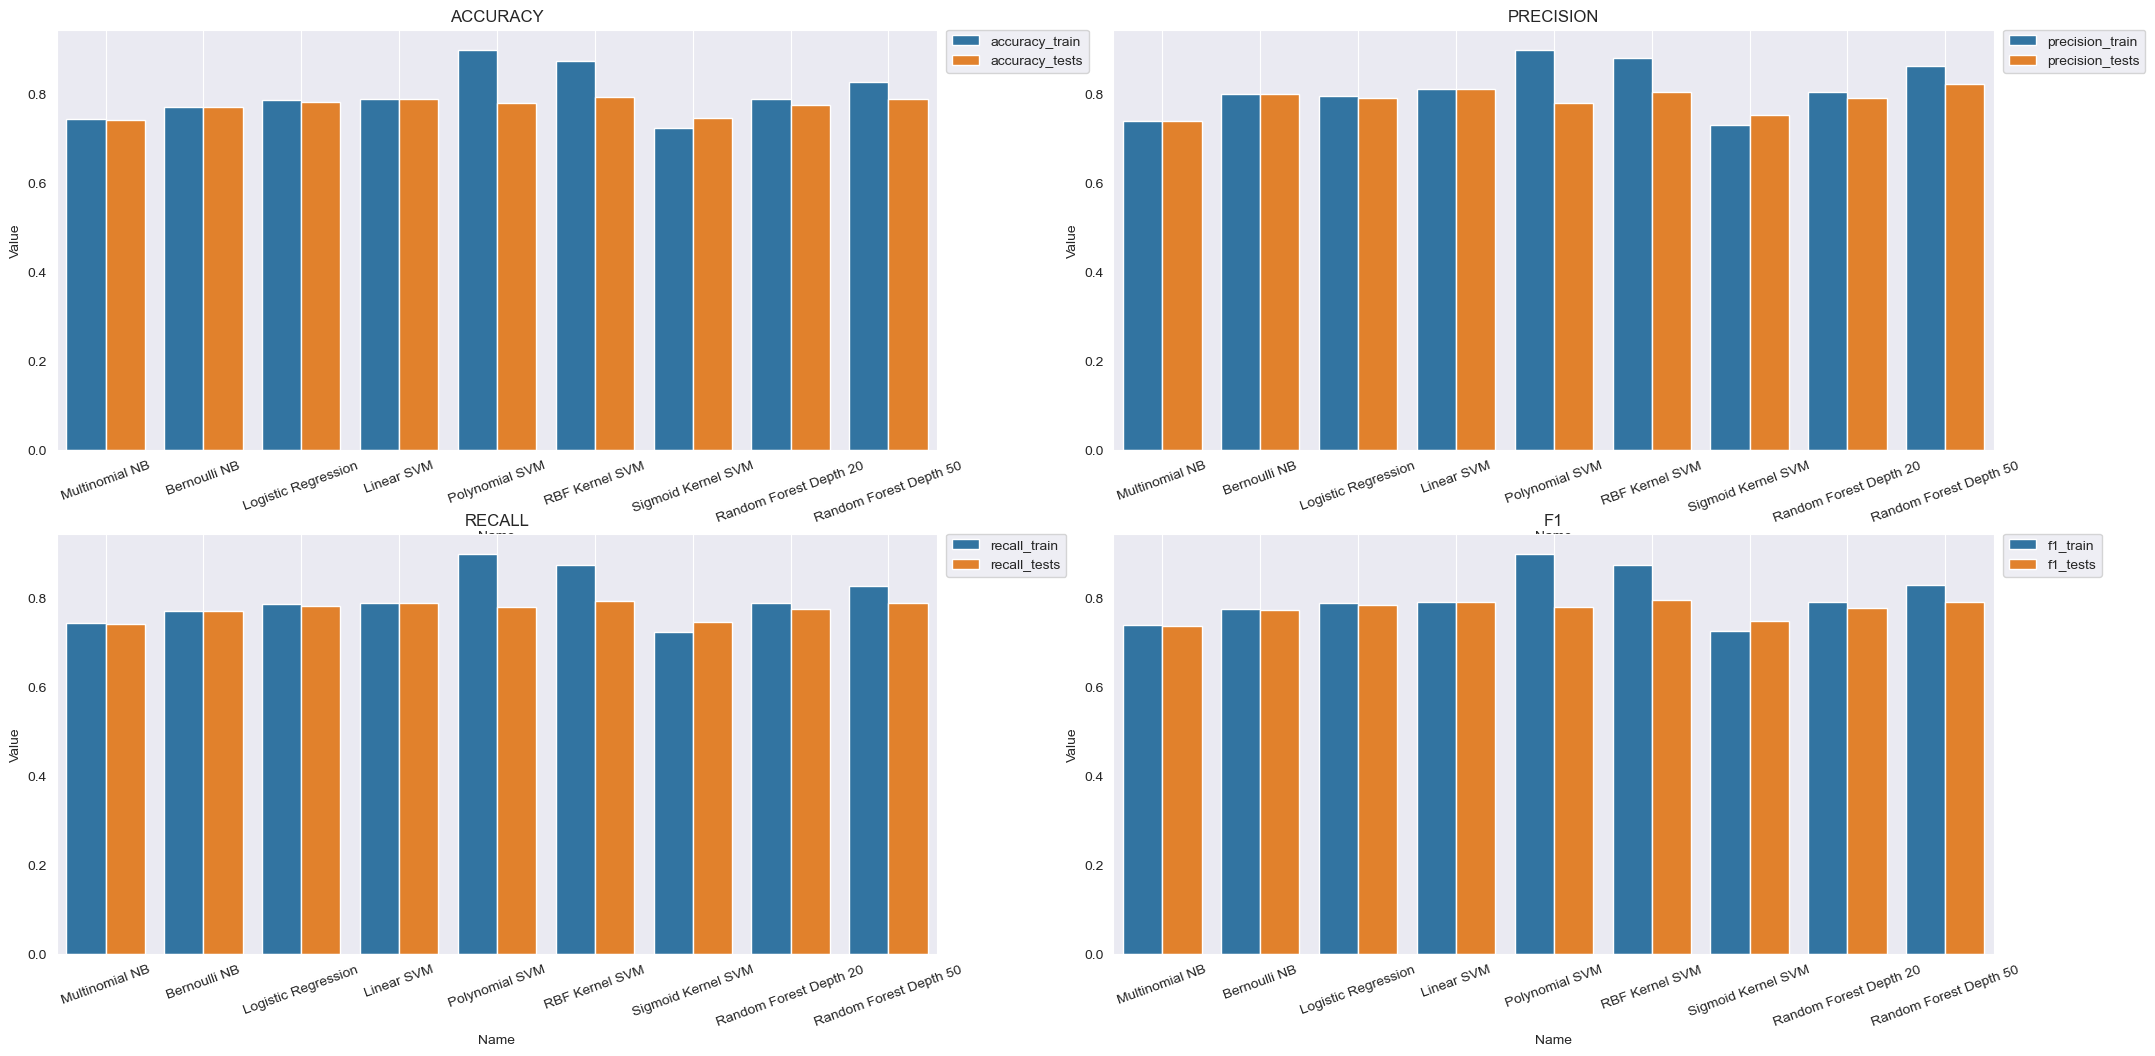

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

# Obtenemos las Matrices de confusión
msc = list()
for k, v in classifiers.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = dict()
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 45))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['positive', 'neutral', 'negative'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

Obteniendo Matriz de Confusión de: Multinomial NB
Obteniendo Matriz de Confusión de: Bernoulli NB
Obteniendo Matriz de Confusión de: Logistic Regression
Obteniendo Matriz de Confusión de: Linear SVM
Obteniendo Matriz de Confusión de: Polynomial SVM


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import joblib

def load_vectorizer():
    return joblib.load('../models/tfidf_vectorizer.pkl')

def load_models(models):
    classifiers = {}
    for model in models:
        classifiers[model] = joblib.load('../models/{model}.pkl'.format(model='_'.join(model.lower().split())))
    return classifiers

def predict_text(text, vectorizer, classifiers):
    text = vectorizer.transform([text])
    for k, v in classifiers.items():
        print('Modelo: {model}'.format(model=k))
        print('Predicción: {pred}'.format(pred='Si' if v.predict(text)[0] == 1 else 'No'))
        # print('Probabilidad de la predicción: {prob}'.format(prob=v.predict_proba(text)))
        print('--------------------------------------------------')

classifiers = {}
MODELS = ['Multinomial NB', 'Bernoulli NB', 'Logistic Regression', 'Linear SVM', 'Polynomial SVM', 'RBF Kernel SVM', 'Sigmoid Kernel SVM', 'Random Forest depth 20', 'Random Forest depth 50']

# Uso de las funciones
dataframe = pd.read_csv('../data/cyberbullying_preprocessed.csv')
data = [tuple(x) for x in dataframe.values]

# Texto con acoso o bullying a predecir (inglés, por el momento)
text = 'Hi! I hate you!'

tfidf_vectorizer = load_vectorizer()
clasificadores = load_models(MODELS)
predict_text(text, tfidf_vectorizer, clasificadores)

Modelo: Multinomial NB
Predicción: Si
--------------------------------------------------
Modelo: Bernoulli NB
Predicción: No
--------------------------------------------------
Modelo: Logistic Regression
Predicción: Si
--------------------------------------------------
Modelo: Linear SVM
Predicción: No
--------------------------------------------------
Modelo: Polynomial SVM
Predicción: Si
--------------------------------------------------
Modelo: RBF Kernel SVM
Predicción: No
--------------------------------------------------
Modelo: Sigmoid Kernel SVM
Predicción: Si
--------------------------------------------------
Modelo: Random Forest depth 20
Predicción: No
--------------------------------------------------
Modelo: Random Forest depth 50
Predicción: No
--------------------------------------------------
